In [ ]:
!nvidia-smi

Sun Mar 17 12:14:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

d:\pkm24\counter_vehicle\pretrained


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="...")
project = rf.workspace("...").project("...")
version = project.version(1)
dataset = version.download("...")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicle-counting-1 in yolov8:: 100%|██████████| 8542/8542 [00:01<00:00, 5265.89it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content/datasets
100% 21.5M/21.5M [00:00<00:00, 38.5MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/datasets/vehicle-counting-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1710677802.cab9af2a1e62.8246.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3690.jpg  weights
P_curve.png					    train_batch3691.jpg
PR_curve.png					    train_batch3692.jpg


/content/datasets


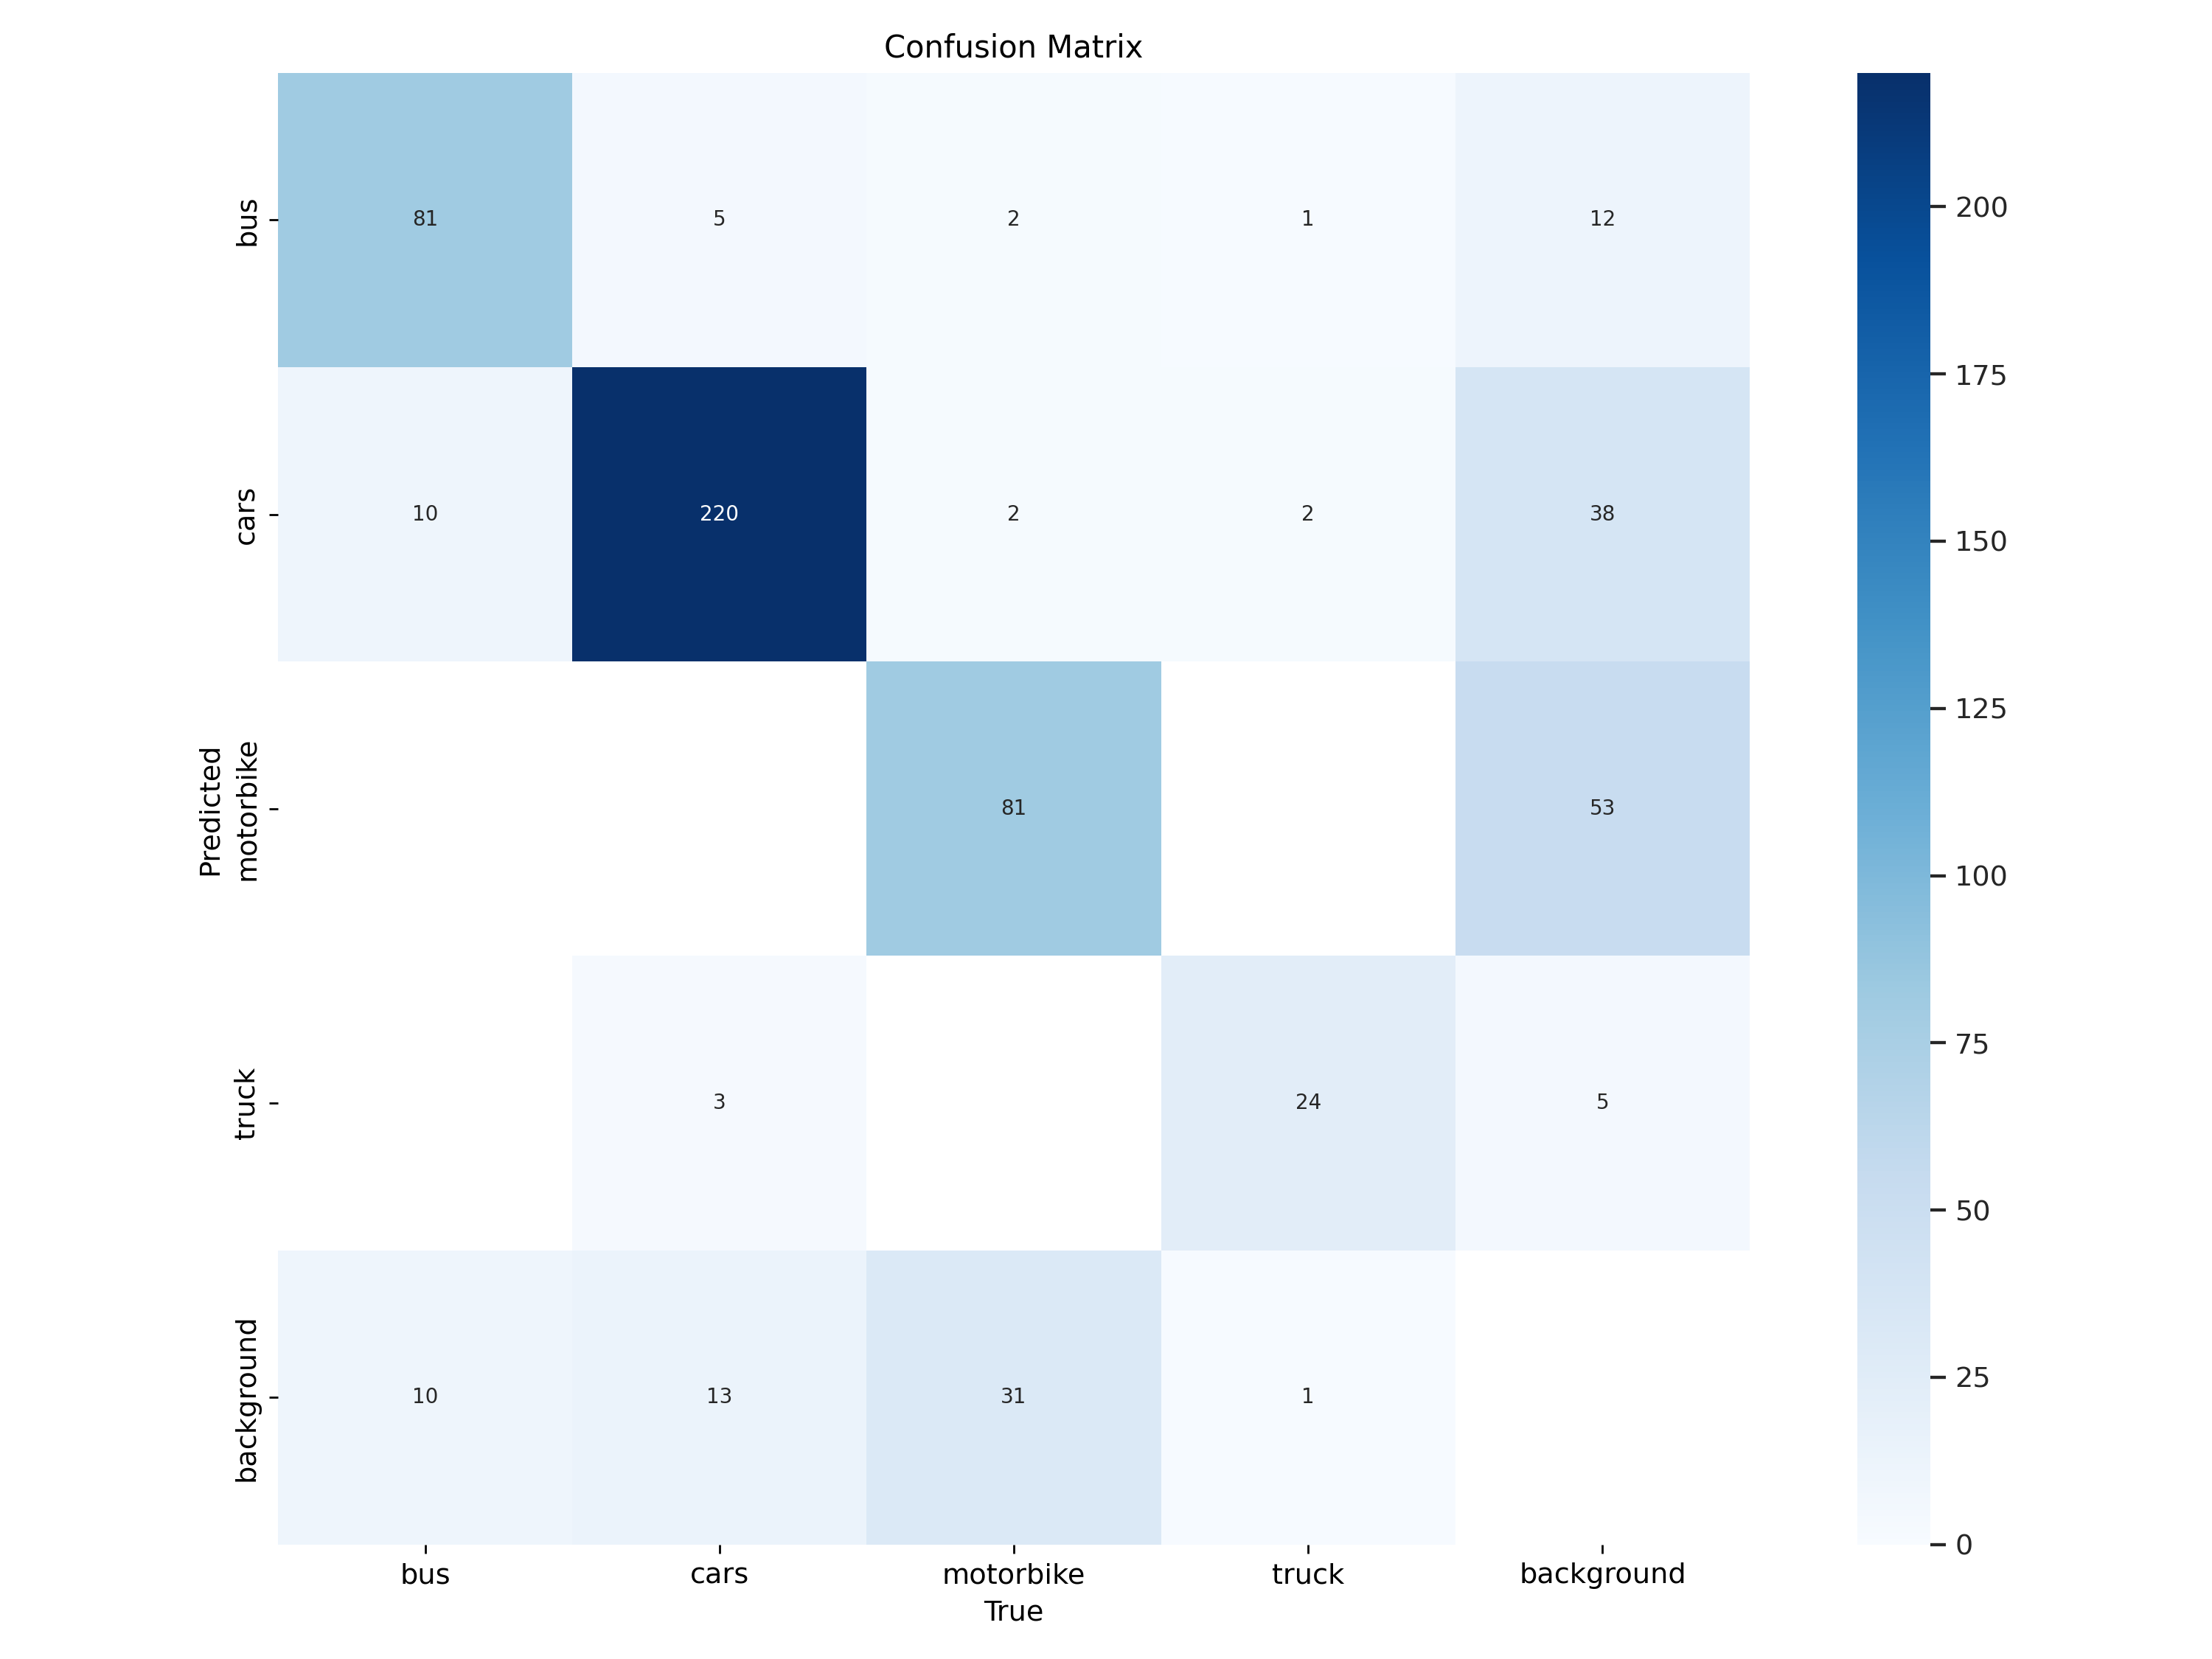

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/datasets


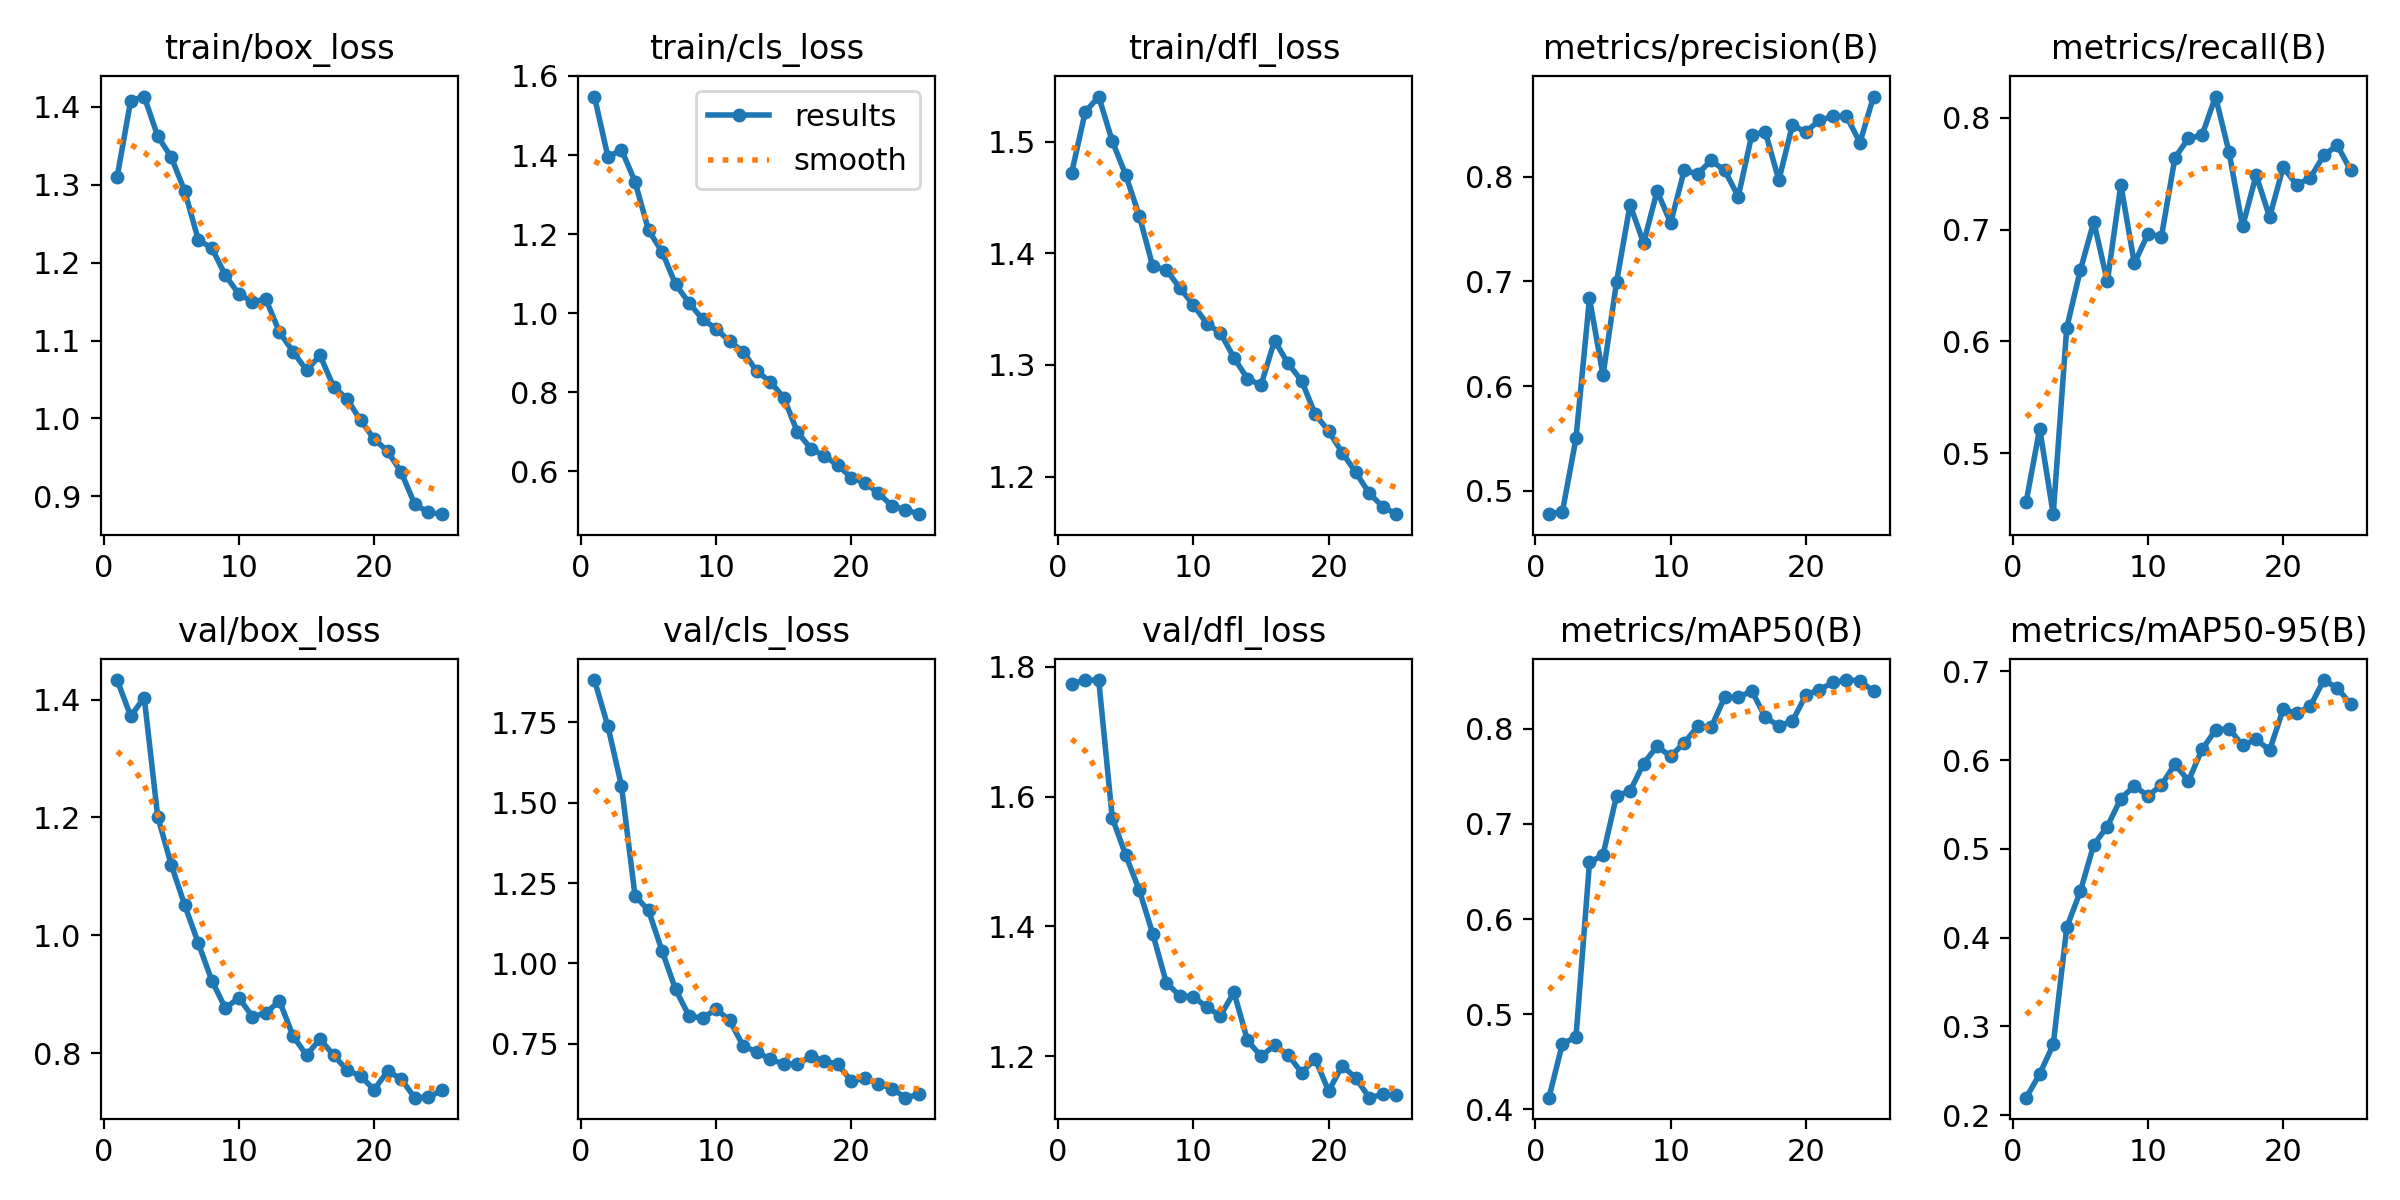

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/datasets


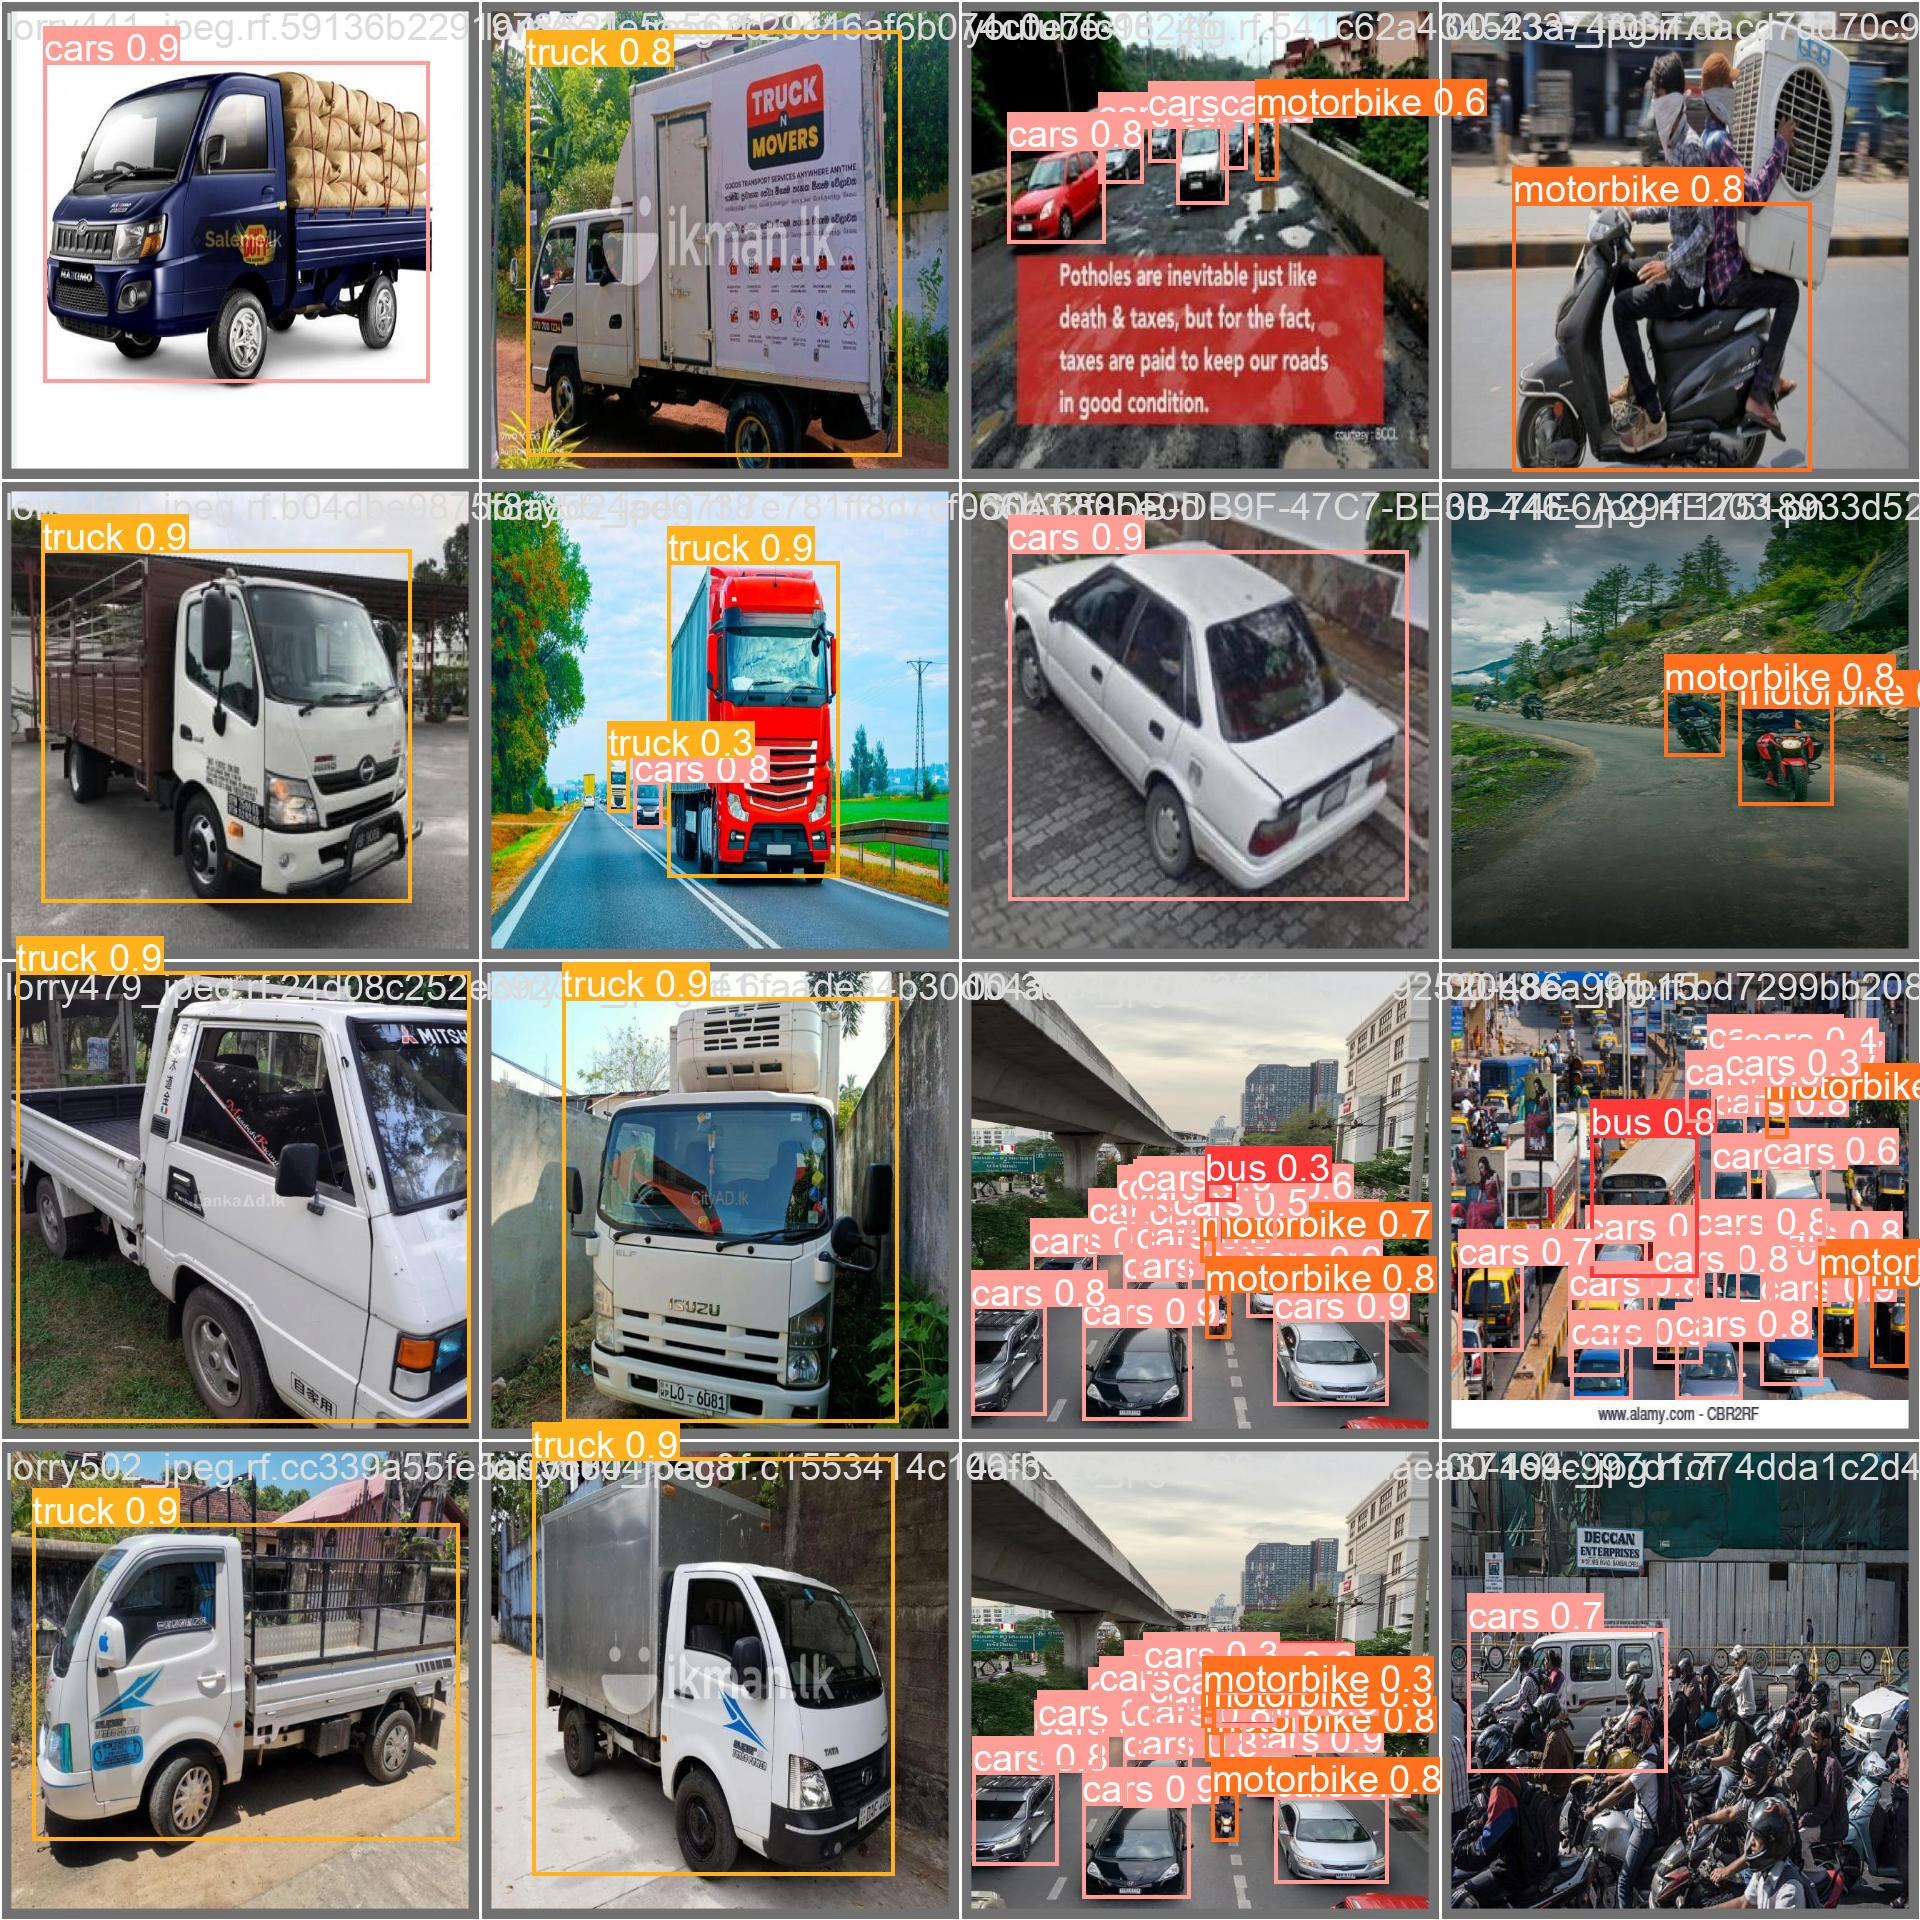

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/datasets/vehicle-counting-1/valid/labels.cache... 239 images, 1 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:07<00:00,  1.93it/s]
                   all        239        486      0.858      0.767      0.851       0.69
                   bus        239        101      0.901      0.802      0.879      0.788
                  cars        239        241      0.905      0.855      0.928      0.779
             motorbike        239        116        0.8      0.588        0.7      0.394
                 truck        239         28      0.823      0.821      0.896        0.8
Speed: 2.2ms preprocess, 10.4ms inference, 0.0ms loss, 5.2ms postprocess per image
Results s

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/96 /content/datasets/datasets/vehicle-counting-1/test/images/-2526BBBE-6B96-49DC-94B9-880E133FA549-png_jpg.rf.81f0d6e1e8ca48a42df5d6bddbed6b0c.jpg: 640x640 1 cars, 16.4ms
image 2/96 /content/datasets/datasets/vehicle-counting-1/test/images/-4C46AFBE-4FFB-4612-923E-76294EF2233B-png_jpg.rf.aa0683e0b7e3535109b7b8d5425669c9.jpg: 640x640 1 bus, 1 cars, 16.7ms
image 3/96 /content/datasets/datasets/vehicle-counting-1/test/images/00-303-_jpg.rf.7ed54b77854576bacd571a5896b1043c.jpg: 640x640 3 buss, 18 carss, 1 motorbike, 16.4ms
image 4/96 /content/datasets/datasets/vehicle-counting-1/test/images/00-427-_jpg.rf.f903f3a768b6fbe25a9554a7e0a8f686.jpg: 640x640 1 cars, 6 motorbikes, 16.3ms
image 5/96 /content/datasets/datasets/vehicle-counting-1/test/images/00-436-_j

**NOTE:** Let's take a look at few results.

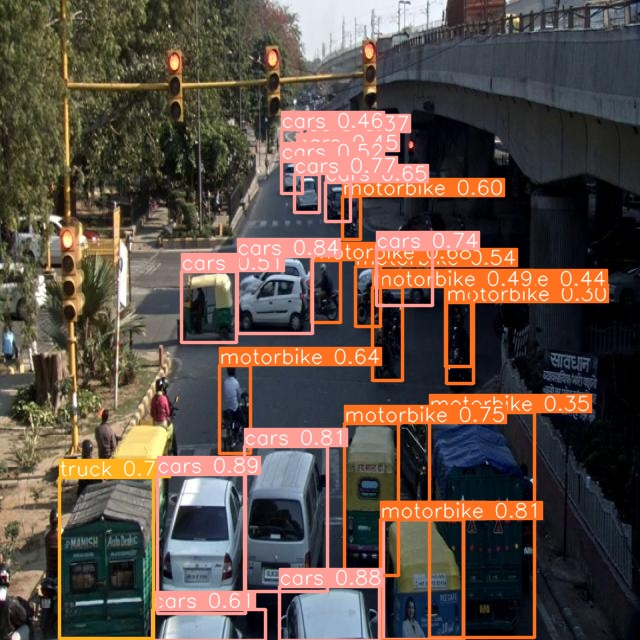

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/Video4_0_jpg.rf.ec852fbcc13e23a8de1c83459735bf8d.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r /content/datasets.zip /content/datasets/

Output streaming akan dipotong hingga 5000 baris terakhir.
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/0FOM9CUJAGFF_jpg.rf.09dcc13ad5414f402dca806f4fc38437.txt (deflated 16%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/car53_jpg.rf.0438814e74dd0821e18fab10adab8157.txt (deflated 14%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/Image_13_JPG.rf.eae78495fac410d17a2e7b5beaa6685e.txt (deflated 21%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/232_jpg.rf.d7228c2c5becae12ad575aa4c6032d0c.txt (deflated 26%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/433_jpg.rf.4f2d814bc114d582829025d8a7a65c7a.txt (deflated 17%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/0827_jpg.rf.5e7c5745cf1f8276312a4756121ca3dc.txt (deflated 26%)
  adding: content/datasets/datasets/vehicle-counting-1/train/labels/114Truck_jpg.rf.3dcfc656e99a8c90dd5681d8fc1ad728.txt (deflated 29%)
  